In [1]:
#pip install poetry

# NLP PROJECT

## How to recognize stress in sending messages ?

#### I chose this dataset because its closely tied to my strong interest in sentiment analysis through stress detection. 
#### My primary goal is to demonstrate my ability to predict and understand stress signals in natural language, using natural language processing techniques. 
#### This project aims to highlight the importance of detecting stress in digital communication, as it can have a significant impact on individuals' mental health and well-being.

### Part 1 : Preprocessing...

Data Loading and Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv("Stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In this project, we're particularly interested in analyzing text data to detect stress effectively. The dataset with 2838 entries, offers various attributes, but we primarily focus on two key features: 'text' and 'label.' 

(X)-'text' because it contains the textual content necessary for sentiment analysis and stress detection. 

(y)-'label' is essential as it provides the target variable, indicating whether a message is associated with stress or not.

Project's core objective is to leverage these two features to develop a robust stress detection model and explore how NLP techniques can help predict stress based on textual content.

In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


((2838, 7), None)

We focus Us on text for our X and label for y

Feature Selection

In [4]:
not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1 = df.drop(not_used_cols,axis=1)
df1.sample(3)

,text,label
1718,My father was diagnosed with Stage 4 prostate ...,1
652,So i was run off the road and needed to repair...,0
6,It was a big company so luckily I didn't have ...,0


In [5]:
df1['label'].unique()

#Text processing
#importing required libraries (nltk,spacy,urllib,re etc.)
#downloading required database (omw), wordnet, punkt, stopwords
#cleaning data (with regualr expression)
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\nicol\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   

True

Initialize stopword

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Cleaning text data

#### Text Preprocessing

I created the textPocess function to clean text entirely. 
It removes brackets, URLs, escape characters, HTML tags, and non-alphanumeric characters, converts text to lowercase, tokenizes it, removes stopwords (with a minor issue), and lemmatizes words. It also includes basic error handling.

In [36]:
# Convert text to lowercase
df1["text"] = df1["text"].str.lower()
df1.sample(3)

,text,label
1268,that completely threw me. i don't know why i'm...,1
2552,his new wife would get mad at me for asking fo...,0
419,if you have a survey you would like to share w...,0


In [37]:
import string

# Define a function to remove punctuation
def remove_punctuation(text: str) -> str:
    translation_table = str.maketrans('', '', string.punctuation)
    return text.translate(translation_table)

# Apply the function to the text
df1["text_wo_punct"] = df1["text"].apply(remove_punctuation)
df1.sample(3)

,text,label,text_wo_punct
78,i'm completely devastated. my cat was just hit...,1,im completely devastated my cat was just hit a...
164,"my father has: keys to a fancy car, like 5 fan...",1,my father has keys to a fancy car like 5 fancy...
545,is this what a guy who loves you deserves? is ...,1,is this what a guy who loves you deserves is t...


In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text: str) -> str:
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in STOPWORDS]
    return ' '.join(filtered_words)

# Apply the function to the text
df1["text_wo_stop"] = df1["text_wo_punct"].apply(remove_stopwords)
df1.sample(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,text_wo_punct,text_wo_stop
1249,i tried to reply to most but i think i'd like ...,0,i tried to reply to most but i think id like t...,tried reply think id like forget post bit move...
2090,so earlier today i was suffering from extreme ...,1,so earlier today i was suffering from extreme ...,earlier today suffering extreme derealization ...
934,"i’m a 24 year old male. for the past month, my...",0,i’m a 24 year old male for the past month my s...,i’m 24 year old male past month stomach little...


In [39]:
from collections import Counter

# Count word frequencies
text_join = " ".join(df1["text_wo_stop"])
text_split = text_join.split()
text_split = [word for word in text_split if word.strip()]
count_words = Counter(text_split)
most_common = count_words.most_common()

# Define a function to remove frequent words
FREQWORDS = [w for (w, word_count) in most_common[:10]]

def remove_freqwords(text: str, freq_words: list=FREQWORDS) -> str:
    text_removed = " ".join([word for word in text.split(" ") if word not in freq_words])
    return text_removed

# Apply the function to the text
df1["text_wo_stopfreq"] = df1["text_wo_stop"].apply(remove_freqwords)
df1.sample(3)

,text,label,text_wo_punct,text_wo_stop,text_wo_stopfreq
1576,"wanted to celebrate with my friends, but i kno...",0,wanted to celebrate with my friends but i know...,wanted celebrate friends know story would worr...,wanted celebrate friends story worry anything ...
2315,i'm in college now and got high last night and...,1,im in college now and got high last night and ...,im college got high last night felt pretty sad...,college got high last night felt pretty sad wr...
315,i sat her down and told her that she is ruinin...,0,i sat her down and told her that she is ruinin...,sat told ruining chances relationship husband ...,sat told ruining chances relationship husband ...


In [40]:
# Define a function to remove rare words
RAREWORDS = [w for (w, word_count) in most_common[-10:]]

def remove_rarewords(text: str, rare_words: list=RAREWORDS) -> str:
    text_removed = " ".join([word for word in text.split(" ") if word not in rare_words])
    return text_removed

# Apply the function to the text
df1["text_wo_stopfreqrare"] = df1["text_wo_stopfreq"].apply(remove_rarewords)
df1.sample(3)

,text,label,text_wo_punct,text_wo_stop,text_wo_stopfreq,text_wo_stopfreqrare
1729,i get a text from my brother that was essentia...,1,i get a text from my brother that was essentia...,get text brother essentially fuck die nobody w...,text brother essentially fuck die nobody wants...,text brother essentially fuck die nobody wants...
390,he wouldn't take me to the hospital but i coul...,1,he wouldnt take me to the hospital but i could...,wouldnt take hospital could feel gaping wound ...,wouldnt take hospital could gaping wound back ...,wouldnt take hospital could gaping wound back ...
2028,i will do my part in applying for scholarships...,0,i will do my part in applying for scholarships...,part applying scholarships saving money workin...,part applying scholarships saving money workin...,part applying scholarships saving money workin...


In [41]:
from itertools import chain

TO_REMOVE = list(chain(STOPWORDS, FREQWORDS, RAREWORDS))


In [42]:
# Define a function to filter out words
def filter_text(text: str, words_to_remove: list = TO_REMOVE) -> str:
    text_filtered = " ".join([word for word in text.split(" ") if word not in words_to_remove])
    return text_filtered

# Apply the function to the text
df1["processed_text"] = df1["text"].apply(filter_text)
df1 = df1[['text', 'processed_text']]
df1.sample(3)

,text,processed_text
39,"she was seventeen and they met in a hospital, ...","seventeen met hospital, drug rehab, mental hos..."
1244,i feel like a become a mean monster. :( and i ...,become mean monster. :( can’t stop control imm...
2022,i was so desperate that i tried asking some of...,desperate tried asking family members help. mo...


Then I construct my pipeline

In [7]:
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)
        
        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


Test and View

In [29]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))
df1.sample(3)

,text,label,processed_text,text_lengths
1347,I know the best thing for me is to find a new ...,1,know best thing find new job applying quite aw...,790
910,There became two sides of me I battled within ...,1,became two side battled within one hand wanted...,229
2474,I [26F] have been with my boyfriend [30M] for ...,0,26f boyfriend 30m almost 5 year live together ...,468


In [30]:
print("without process ----> ",df1['text'].iloc[23],end='\n\n')
print("after process ----> ",df1['processed_text'].iloc[23])

without process ---->  With a switch blade and open arms In a sweater vest that covers a ragged undershirt stained with my innocence Through faces that are never the same as the ones I dread finding in the crowd In the night, I rediscover my love of mares and how hoarse I can be in the morning It's the taste of blood but I am not bleeding

after process ---->  switch blade open arm sweater vest cover ragged undershirt stained innocence face never one dread finding crowd night rediscover love mare hoarse morning taste blood bleeding


# Vizualisaton

In [31]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

1. Class Distribution:

This bar chart gives us an initial look at our data. 
It's essential for me to understand the balance between stress and non-stress messages. 
We can see that there are more stress messages (represented by the green bars) than stress Non-Stress messages (the light green bars). 

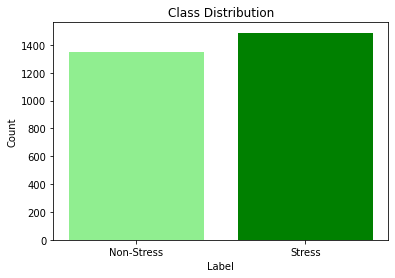

In [32]:
# Calculate class distribution
class_counts = df1['label'].value_counts()
# Create a bar chart to visualize the class distribution in green
plt.bar(class_counts.index, class_counts.values, color=['green', 'lightgreen'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Stress', 'Stress'])
plt.title('Class Distribution')
plt.show()


2.Text Length Distribution:

I make a histogram for text message lengths is quite revealing.
By looking at this, I can quickly get a sense of how long the messages in our dataset are.

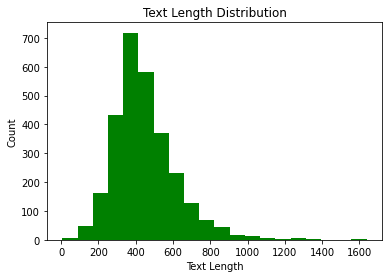

In [33]:
# Calculate text lengths
df1['text_lengths'] = df1['text'].apply(len)

# Calculate text lengths
df1['text_lengths'] = df1['text'].apply(len)

# Create a histogram to visualize the text length distribution in green
plt.hist(df1['text_lengths'], bins=20, color='green')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()


In [24]:
!pip install wordcloud


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

3. Word Cloud:

Word cloud serve us to visualize the most common words in the text and processed text with the 2 differents types of labels. 

It's like peeking into the most frequent terms people use when talking about stress. 

We can see that some words stand out more prominently. These are the terms that are used most frequently in our dataset. It's a quick way for me to grasp the most relevant words.

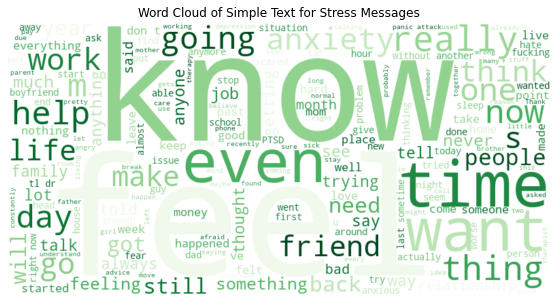

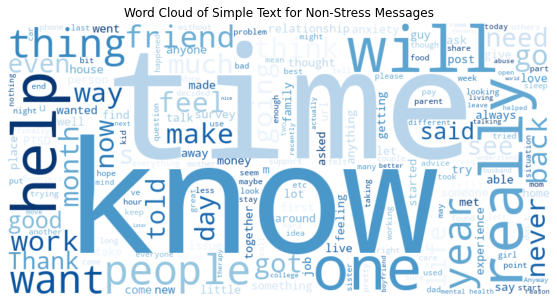

In [26]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for stress messages (label=1) with green color
wordcloud_stress = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(df1[df1['label'] == 1]['text'].str.cat(sep=' '))

# Display the word cloud for stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Simple Text for Stress Messages')
plt.show()

# Generate a word cloud for non-stress messages (label=0) with blue color
wordcloud_non_stress = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(df1[df1['label'] == 0]['text'].str.cat(sep=' '))

# Display the word cloud for non-stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Simple Text for Non-Stress Messages')
plt.show()


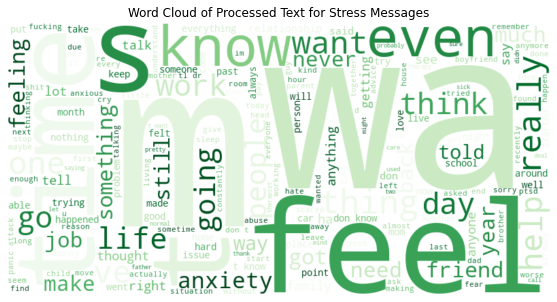

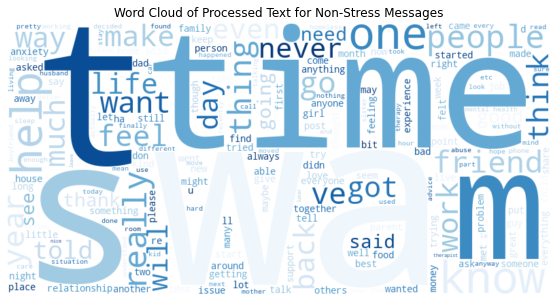

In [27]:
# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for stress messages (label=1) with green color
wordcloud_stress = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(df1[df1['label'] == 1]['processed_text'].str.cat(sep=' '))

# Display the word cloud for stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Text for Stress Messages')
plt.show()

# Generate a word cloud for non-stress messages (label=0) with blue color
wordcloud_non_stress = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(df1[df1['label'] == 0]['processed_text'].str.cat(sep=' '))

# Display the word cloud for non-stress messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_stress, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Text for Non-Stress Messages')
plt.show()


4. Bar Plot of Top N Words: 

To visualize the most frequently occurring words in your dataset.

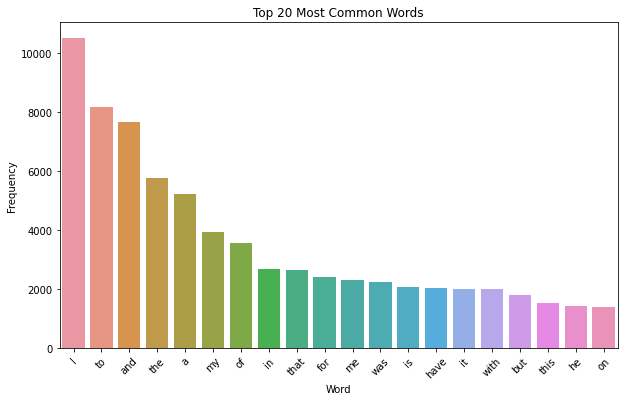

In [28]:
from collections import Counter
import seaborn as sns

word_counter = Counter(" ".join(df['text']).split())
most_common_words = word_counter.most_common(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=[w[0] for w in most_common_words], y=[w[1] for w in most_common_words])
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()
